In [1]:
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
import hist
import correctionlib
sys.path.append("../../analysisTools/")
import plotTools as ptools

# electron SFs

In [2]:
base = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools/corrections/ged_electronID/2018/"
ceval = correctionlib.CorrectionSet.from_file(base+"electron.json.gz")

In [3]:
list(ceval.keys())

['UL-Electron-ID-SF']

In [4]:
for corr in ceval.values():
    print(f"Correction {corr.name} has {len(corr.inputs)} inputs")
    for ix in corr.inputs:
        print(f"   Input {ix.name} ({ix.type}): {ix.description}")

Correction UL-Electron-ID-SF has 5 inputs
   Input year (string): year/scenario: example 2016preVFP, 2017 etc
   Input ValType (string): sf/sfup/sfdown (sfup = sf + syst, sfdown = sf - syst) 
   Input WorkingPoint (string): Working Point of choice : Loose, Medium etc.
   Input eta (real): supercluster eta
   Input pt (real): electron pT


In [7]:
ceval['UL-Electron-ID-SF'].evaluate("2018","sf","Loose",0.6,10.0)

1.0122137069702148

In [9]:
ceval['UL-Electron-ID-SF'].evaluate("2018","sfdown","Loose",0.6,10.0)

0.9829092049102964

# pileup

In [2]:
base = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools/corrections/pileup/2018/"
ceval = correctionlib.CorrectionSet.from_file(base+"puWeights.json.gz")

In [3]:
for corr in ceval.values():
    print(f"Correction {corr.name} has {len(corr.inputs)} inputs")
    for ix in corr.inputs:
        print(f"   Input {ix.name} ({ix.type}): {ix.description}")

Correction Collisions18_UltraLegacy_goldenJSON has 2 inputs
   Input NumTrueInteractions (real): Number of true interactions
   Input weights (string): nominal, up, or down


In [4]:
ceval['Collisions18_UltraLegacy_goldenJSON'].evaluate(31.0,'nominal')

1.0017575672430654

In [73]:
hc = ptools.histContainer("bkg_PUplots_QCD_2018.coffea")

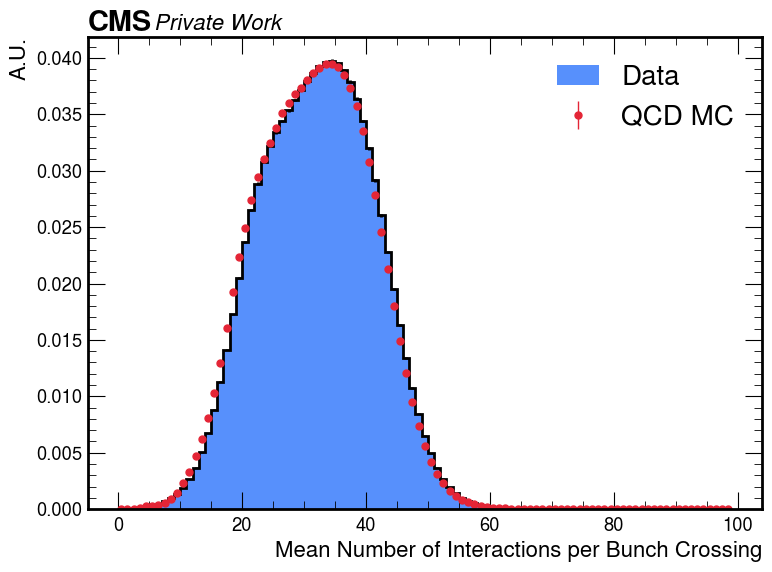

In [86]:
hmc = hc.load("genPU_true")[{"cut":"all","samp":sum}]
f = ur.open(base+"PileupHistogram-goldenJSON-13tev-2018-69200ub-99bins.root")
h = f['pileup'].to_hist()
c_data = hep.styles.cms.cmap_petroff[0]
c_mc = hep.styles.cms.cmap_petroff[2]

plt.figure(figsize=(8,6))

hep.histplot(h,histtype='fill',lw=2,color=c_data,density=True,label="Data")
hep.histplot(h,histtype='step',lw=2,color='k',density=True)
hep.histplot(hmc.values(),bins=h.axes[0].edges,label="QCD MC",histtype='errorbar',density=True,color=c_mc)
plt.legend(fontsize=20)
plt.ylabel("A.U.")
hep.cms.text("Private Work")
plt.xlabel("Mean Number of Interactions per Bunch Crossing")
plt.tight_layout()
plt.savefig("data_vs_QCDMC_pileup_2018.pdf")

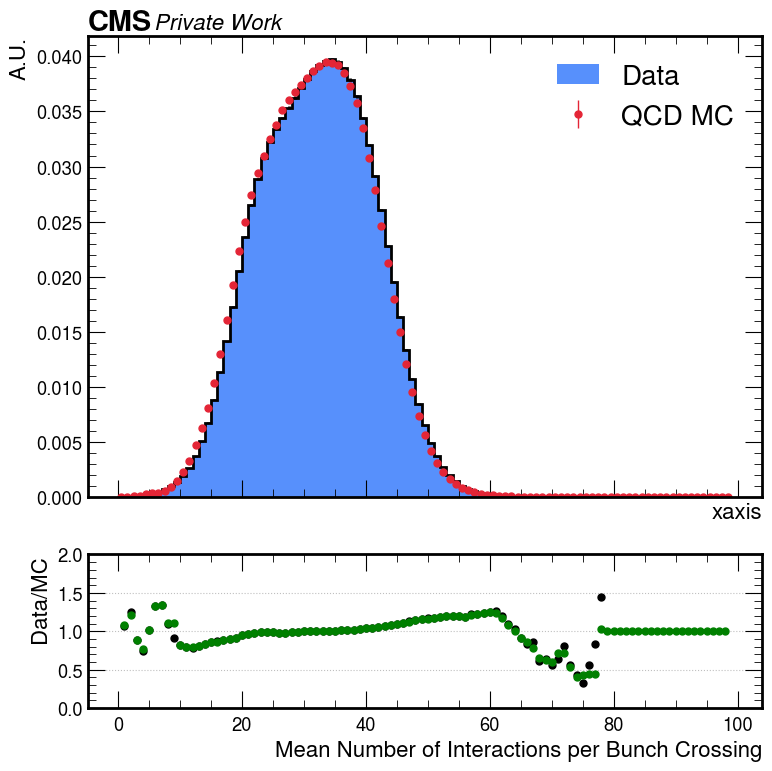

In [87]:
f = ur.open(base+"PileupHistogram-goldenJSON-13tev-2018-69200ub-99bins.root")
h = f['pileup'].to_hist()
c_data = hep.styles.cms.cmap_petroff[0]
c_mc = hep.styles.cms.cmap_petroff[2]

fig,axes = plt.subplots(2,1,sharex=True,height_ratios=[3,1],figsize=(8,8))

plt.sca(axes[0])
hep.histplot(h,histtype='fill',lw=2,color=c_data,density=True,label="Data")
hep.histplot(h,histtype='step',lw=2,color='k',density=True)
hep.histplot(hmc.values(),bins=h.axes[0].edges,label="QCD MC",histtype='errorbar',density=True,color=c_mc)
plt.legend(fontsize=20)
plt.ylabel("A.U.")
hep.cms.text("Private Work")

plt.sca(axes[1])
plt.xlabel("Mean Number of Interactions per Bunch Crossing")
num = h.values()/h.values().sum()
den = hmc.values()/hmc.values().sum()
plt.ylabel("Data/MC")
x = hmc.axes[0].centers
ratio = np.divide(num,den,where=den>0,out=np.full_like(x,np.nan))
plt.plot(x,ratio,marker='.',lw=0,markersize=10,color='black')
plt.ylim([0,2])
plt.grid(axis='y')
ref = ceval['Collisions18_UltraLegacy_goldenJSON'].evaluate(x,'nominal')
plt.plot(x,ref,marker='.',lw=0,markersize=10,color='green')
plt.tight_layout()
plt.savefig("data_vs_QCDMC_pileup_2018_withRatio.pdf")

# b-tag

In [88]:
base = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools/corrections/btag/2018/"
ceval = correctionlib.CorrectionSet.from_file(base+"btagging.json.gz")

In [89]:
list(ceval.keys())

['deepCSV_comb',
 'deepCSV_incl',
 'deepCSV_mujets',
 'deepCSV_shape',
 'deepCSV_wp_values',
 'deepJet_comb',
 'deepJet_incl',
 'deepJet_mujets',
 'deepJet_shape',
 'deepJet_wp_values']

In [90]:
for corr in ceval.values():
    print(f"Correction {corr.name} has {len(corr.inputs)} inputs")
    for ix in corr.inputs:
        print(f"   Input {ix.name} ({ix.type}): {ix.description}")

Correction deepCSV_comb has 5 inputs
   Input systematic (string): 
   Input working_point (string): L/M/T
   Input flavor (int): hadron flavor definition: 5=b, 4=c, 0=udsg
   Input abseta (real): 
   Input pt (real): 
Correction deepCSV_incl has 5 inputs
   Input systematic (string): 
   Input working_point (string): L/M/T
   Input flavor (int): hadron flavor definition: 5=b, 4=c, 0=udsg
   Input abseta (real): 
   Input pt (real): 
Correction deepCSV_mujets has 5 inputs
   Input systematic (string): 
   Input working_point (string): L/M/T
   Input flavor (int): hadron flavor definition: 5=b, 4=c, 0=udsg
   Input abseta (real): 
   Input pt (real): 
Correction deepCSV_shape has 5 inputs
   Input systematic (string): 
   Input flavor (int): hadron flavor definition: 5=b, 4=c, 0=udsg
   Input abseta (real): 
   Input pt (real): 
   Input discriminant (real): deepCSV output value
Correction deepCSV_wp_values has 1 inputs
   Input working_point (string): L/M/T
Correction deepJet_comb has 

In [106]:
import json
import gzip
with gzip.open(base+"btagging.json.gz","r") as fin:
    js = json.loads(fin.read().decode('utf-8'))

In [142]:
nkeys = len(js['corrections'][8]['data']['content'])
for i in range(nkeys):
    print(js['corrections'][8]['data']['content'][i]['key'])

central
down
down_fsr
down_hdamp
down_isr
down_jer
down_jes
down_pileup
down_qcdscale
down_statistic
down_topmass
down_type3
up
up_fsr
up_hdamp
up_isr
up_jer
up_jes
up_pileup
up_qcdscale
up_statistic
up_topmass
up_type3
down_correlated
down_uncorrelated
up_correlated
up_uncorrelated
